In [7]:
from openai import OpenAI
import os
from sklearn.manifold import TSNE 
import numpy as np
import matplotlib.pyplot as plt 

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

client = OpenAI(api_key=os.getenv('OPENAI_API_KEY'))

# What are wmbeddings?

## Creating embeddings

In [8]:
response = client.embeddings.create(
    model="text-embedding-ada-002",
    input="Embeddings are a numerical representation of text that can be used to measure the relatedness between two pieces of text."
)

# Convert the response into a dictionary
response_dict = response.model_dump()

print(response_dict)

{'data': [{'embedding': [-0.02658679150044918, 0.002423867117613554, 0.010440302081406116, -0.027495741844177246, -0.002021467313170433, -0.011197760701179504, 0.0022155658807605505, -0.010743285529315472, -0.013167153112590313, -0.01629798114299774, 0.0011977311223745346, 0.029591375961899757, -0.01917632296681404, 0.007429405115544796, -0.011765854433178902, 0.03244446963071823, 0.014101351611316204, -0.0011716935550794005, 0.013028285466134548, -0.02493300661444664, -0.028202703222632408, -0.011065205559134483, -0.023645328357815742, -0.0018115881830453873, -0.021764306351542473, -0.0018605072982609272, 0.021183587610721588, -0.02377157099545002, -0.008881200104951859, -0.0197317935526371, 0.007549335714429617, -0.020931102335453033, -0.023910438641905785, -0.017118560150265694, -0.020161019638180733, 0.009057940915226936, 0.00989745743572712, -0.035853032022714615, 0.029995353892445564, -0.014303340576589108, -0.005611504893749952, 0.01796438917517662, 0.007681891322135925, -0.0251

In [9]:
print(response_dict['usage']['total_tokens'])

23


In [10]:
print(response_dict['data'][0]['embedding'])

[-0.02658679150044918, 0.002423867117613554, 0.010440302081406116, -0.027495741844177246, -0.002021467313170433, -0.011197760701179504, 0.0022155658807605505, -0.010743285529315472, -0.013167153112590313, -0.01629798114299774, 0.0011977311223745346, 0.029591375961899757, -0.01917632296681404, 0.007429405115544796, -0.011765854433178902, 0.03244446963071823, 0.014101351611316204, -0.0011716935550794005, 0.013028285466134548, -0.02493300661444664, -0.028202703222632408, -0.011065205559134483, -0.023645328357815742, -0.0018115881830453873, -0.021764306351542473, -0.0018605072982609272, 0.021183587610721588, -0.02377157099545002, -0.008881200104951859, -0.0197317935526371, 0.007549335714429617, -0.020931102335453033, -0.023910438641905785, -0.017118560150265694, -0.020161019638180733, 0.009057940915226936, 0.00989745743572712, -0.035853032022714615, 0.029995353892445564, -0.014303340576589108, -0.005611504893749952, 0.01796438917517662, 0.007681891322135925, -0.02514762058854103, -0.004655

## Investigating the vector space

In [11]:
products = [
    {'title': 'Smartphone X1', 'short_description': 'The latest flagship smartphone with AI-powered features and 5G connectivity.', 'price': 799.99, 'category': 'Electronics', 'features': ['6.5-inch AMOLED display', 'Quad-camera system with 48MP main sensor', 'Face recognition and fingerprint sensor', 'Fast wireless charging']}, 
    {'title': 'Luxury Diamond Necklace', 'short_description': 'Elegant necklace featuring genuine diamonds, perfect for special occasions.', 'price': 1499.99, 'category': 'Beauty', 'features': ['18k white gold chain', '0.5 carat diamond pendant', 'Adjustable chain length', 'Gift box included']}, 
    {'title': 'RC Racing Car', 'short_description': 'High-speed remote-controlled racing car for adrenaline-packed fun.', 'price': 89.99, 'category': 'Toys', 'features': ['Top speed of 30 mph', 'Responsive remote control', 'Rechargeable battery', 'Durable construction']}, 
    {'title': 'Ultra HD 4K TV', 'short_description': 'Immerse yourself in stunning visuals with this 65-inch 4K TV.', 'price': 1299.99, 'category': 'Electronics', 'features': ['65-inch 4K UHD display', 'Dolby Vision and HDR10+ support', 'Smart TV with streaming apps', 'Voice remote included']}, 
    {'title': 'Glowing Skin Serum', 'short_description': 'Revitalize your skin with this nourishing serum for a radiant glow.', 'price': 39.99, 'category': 'Beauty', 'features': ['Hyaluronic acid and vitamin C', 'Hydrates and reduces fine lines', 'Suitable for all skin types', 'Cruelty-free']}, 
    {'title': 'LEGO Space Shuttle', 'short_description': 'Build your own space adventure with this LEGO space shuttle set.', 'price': 49.99, 'category': 'Toys', 'features': ['359 pieces for creative building', 'Astronaut minifigure included', 'Compatible with other LEGO sets', 'For ages 7+']}, 
    {'title': 'Wireless Noise-Canceling Headphones', 'short_description': 'Enjoy immersive audio and block out distractions with these headphones.', 'price': 199.99, 'category': 'Electronics', 'features': ['Active noise cancellation', 'Bluetooth 5.0 connectivity', 'Long-lasting battery life', 'Foldable design for portability']}, 
    {'title': 'Luxury Perfume Gift Set', 'short_description': 'Indulge in a collection of premium fragrances with this gift set.', 'price': 129.99, 'category': 'Beauty', 'features': ['Five unique scents', 'Elegant packaging', 'Perfect gift for fragrance enthusiasts', 'Variety of fragrance notes']}, 
    {'title': 'Remote-Controlled Drone', 'short_description': 'Take to the skies and capture stunning aerial footage with this drone.', 'price': 299.99, 'category': 'Electronics', 'features': ['4K camera with gimbal stabilization', 'GPS-assisted flight', 'Remote control with smartphone app', 'Return-to-home function']}, 
    {'title': 'Luxurious Spa Gift Basket', 'short_description': 'Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.', 'price': 79.99, 'category': 'Beauty', 'features': ['Bath bombs, body lotion, and more', 'Aromatherapy candles', 'Reusable wicker basket', 'Great for self-care']}, 
    {'title': 'Robot Building Kit', 'short_description': 'Learn robotics and coding with this educational robot building kit.', 'price': 59.99, 'category': 'Toys', 'features': ['Build and program your own robot', 'STEM learning tool', 'Compatible with Scratch and Python', 'Ideal for young inventors']}, 
    {'title': 'High-Performance Gaming Laptop', 'short_description': 'Dominate the gaming world with this powerful gaming laptop.', 'price': 1499.99, 'category': 'Electronics', 'features': ['Intel Core i7 processor', 'NVIDIA RTX graphics', '144Hz refresh rate display', 'RGB backlit keyboard']}, 
    {'title': 'Natural Mineral Makeup Set', 'short_description': 'Enhance your beauty with this mineral makeup set for a flawless look.', 'price': 34.99, 'category': 'Beauty', 'features': ['Mineral foundation and eyeshadows', 'Non-comedogenic and paraben-free', 'Cruelty-free and vegan', 'Includes makeup brushes']}, 
    {'title': 'Interactive Robot Pet', 'short_description': 'Adopt your own robot pet that responds to your voice and touch.', 'price': 79.99, 'category': 'Toys', 'features': ['Realistic pet behaviors', 'Voice recognition and touch sensors', 'Teaches responsibility and empathy', 'Rechargeable battery']}, 
    {'title': 'Smart Thermostat', 'short_description': "Control your home's temperature and save energy with this smart thermostat.", 'price': 129.99, 'category': 'Electronics', 'features': ['Wi-Fi connectivity', 'Energy-saving features', 'Compatible with voice assistants', 'Easy installation']}, 
    {'title': 'Designer Makeup Brush Set', 'short_description': 'Upgrade your makeup routine with this premium designer brush set.', 'price': 59.99, 'category': 'Beauty', 'features': ['High-quality synthetic bristles', 'Chic designer brush handles', 'Complete set for all makeup needs', 'Includes stylish carrying case']}, 
    {'title': 'Remote-Controlled Dinosaur Toy', 'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.', 'price': 49.99, 'category': 'Toys', 'features': ['Realistic dinosaur sound effects', 'Walks and roars like a real dinosaur', 'Remote control included', 'Educational and entertaining']}, 
    {'title': 'Wireless Charging Dock', 'short_description': 'Charge your devices conveniently with this sleek wireless charging dock.', 'price': 39.99, 'category': 'Electronics', 'features': ['Qi wireless charging technology', 'Supports multiple devices', 'LED charging indicators', 'Compact and stylish design']}, 
    {'title': 'Luxury Skincare Set', 'short_description': 'Elevate your skincare routine with this luxurious skincare set.', 'price': 179.99, 'category': 'Beauty', 'features': ['Premium anti-aging ingredients', 'Hydrating and rejuvenating formulas', 'Complete skincare regimen', 'Elegant packaging']}
    ]

product_descriptions = [product['short_description'] for product in products]

response = client.embeddings.create(   
    model="text-embedding-ada-002",   
    input=product_descriptions
)
response_dict = response.model_dump()

for i, product in enumerate(products):
    product['embedding'] = response_dict['data'][i]['embedding']
    
print(products[0].items())

dict_items([('title', 'Smartphone X1'), ('short_description', 'The latest flagship smartphone with AI-powered features and 5G connectivity.'), ('price', 799.99), ('category', 'Electronics'), ('features', ['6.5-inch AMOLED display', 'Quad-camera system with 48MP main sensor', 'Face recognition and fingerprint sensor', 'Fast wireless charging']), ('embedding', [-0.014657561667263508, 0.0035799273755401373, 0.004385573323816061, -0.017256420105695724, -0.0038398131728172302, 0.014995412901043892, -0.02175244502723217, 0.0002472976048011333, -0.016333825886249542, -0.014735527336597443, 0.028795350342988968, 0.010986673645675182, -0.009349392727017403, -0.02144058234989643, -0.01834793947637081, -0.010551365092396736, 0.012078193947672844, -0.012292600236833096, 0.021479563787579536, -0.020271094515919685, -0.016125915572047234, 0.006536128930747509, 0.008173409849405289, 0.006029351614415646, 0.005610285326838493, -0.010817748494446278, 0.005941640119999647, -0.0006403749575838447, 0.0071

## Visualizing the embedded descriptions

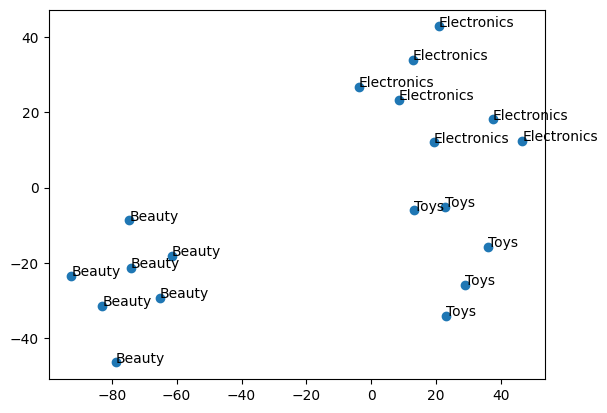

In [12]:
# Create reviews and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embedding'] for product in products]

# Reduce the number of embeddings dimensions to two using t-SNE
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Create a scatter plot from embeddings_2d
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, category in enumerate(categories):
    plt.annotate(category, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()